Index(['Price', 'Open', 'High', 'Low', 'Vol.', 'Change %'], dtype='object')
               Price      Open      High       Low    Vol. Change %
Date                                                               
01/06/2024  67,760.8  67,533.9  67,861.0  67,449.6  19.01K    0.34%
31/05/2024  67,530.1  68,352.3  69,018.2  66,676.8  61.51K   -1.21%
30/05/2024  68,354.7  67,631.3  69,504.7  67,138.4  66.84K    1.06%
29/05/2024  67,635.8  68,366.2  68,897.6  67,143.2  52.13K   -1.07%
28/05/2024  68,366.0  69,428.3  69,560.7  67,299.9  71.39K   -1.53%
Train error: 236349078.56935245
Test error: 247679899.50543493


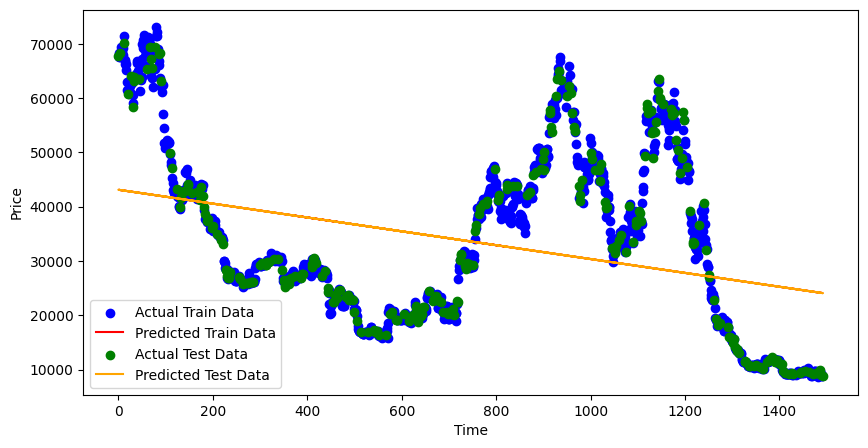

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Exercise 9

# Linear Regression

data = pd.read_csv('Bitcoin Historical Price Data.csv', index_col=0)
print(data.keys())
print(data.head())  # Display first few rows to understand the structure

# Clean the 'Price' column by removing commas and converting to float
data['Price'] = data['Price'].str.replace(',', '').astype(float)

# Assuming 'Price' is the column to predict and we will use date indices as the feature for simplicity
# Extract the target variable 'Price'
Y = data['Price'].values

# Extract features; in this case, we can use the range of dates as a simple example
# This is a simplified example, usually you would have more features
X = np.array(range(len(data))).reshape(-1, 1)

# Use Scikit-Learn to do linear regression
linearRegressor = LinearRegression()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1234)

# Train the model
linearRegressor.fit(X_train, y_train)

# Make predictions
y_train_pred = linearRegressor.predict(X_train)
y_test_pred = linearRegressor.predict(X_test)

# Print errors
print('Train error:', mean_squared_error(y_train, y_train_pred))
print('Test error:', mean_squared_error(y_test, y_test_pred))


import matplotlib.pyplot as plt

# Plotting the results
plt.figure(figsize=(10, 5))

# Plot training data
plt.scatter(X_train, y_train, color='blue', label='Actual Train Data')
plt.plot(X_train, y_train_pred, color='red', label='Predicted Train Data')

# Plot test data
plt.scatter(X_test, y_test, color='green', label='Actual Test Data')
plt.plot(X_test, y_test_pred, color='orange', label='Predicted Test Data')

plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

